In [12]:
from census import Census
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd


In [13]:
travel_time_df = pd.read_csv('..\\Data\\Travel_Time_Table',dtype={'tract':'object'})
#travel_time_df['Mean Time'].mean()


<Axes: >

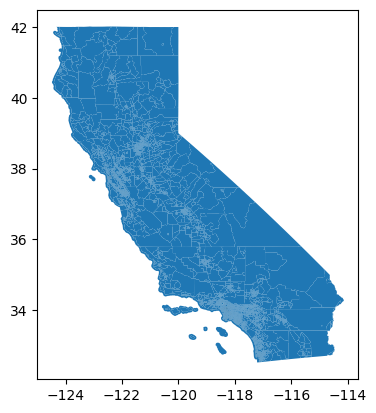

In [14]:
path = "..\\Data\\tl_2021_06_tract\\tl_2021_06_tract.shp"
tract_df = gpd.read_file(path).to_crs("EPSG:4326")

tract_df.plot()

In [16]:
tract_df = tract_df.loc[tract_df['COUNTYFP']== '073',]
tract_df

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1627,06,073,007702,06073007702,77.02,Census Tract 77.02,G5020,S,618401,0,+32.7899000,-117.2350654,"POLYGON ((-117.23910 32.79396, -117.23873 32.7..."
1628,06,073,020308,06073020308,203.08,Census Tract 203.08,G5020,S,1211945,0,+33.1373657,-117.0979771,"POLYGON ((-117.10405 33.14203, -117.10390 33.1..."
1654,06,073,017801,06073017801,178.01,Census Tract 178.01,G5020,S,4345848,116020,+33.1735608,-117.3403004,"POLYGON ((-117.34962 33.17620, -117.34904 33.1..."
1670,06,073,012303,06073012303,123.03,Census Tract 123.03,G5020,S,1537489,28342,+32.6514389,-117.0724250,"POLYGON ((-117.08635 32.65061, -117.08626 32.6..."
1671,06,073,004200,06073004200,42,Census Tract 42,G5020,S,2493055,0,+32.7293502,-117.1194471,"POLYGON ((-117.12547 32.72395, -117.12547 32.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9039,06,073,000400,06073000400,4,Census Tract 4,G5020,S,1177454,0,+32.7533382,-117.1630702,"POLYGON ((-117.17087 32.75865, -117.17019 32.7..."
9040,06,073,000500,06073000500,5,Census Tract 5,G5020,S,1108651,0,+32.7605138,-117.1519499,"POLYGON ((-117.16151 32.75890, -117.16149 32.7..."
9041,06,073,000600,06073000600,6,Census Tract 6,G5020,S,932839,0,+32.7529575,-117.1518411,"POLYGON ((-117.16083 32.75827, -117.16077 32.7..."
9051,06,073,003103,06073003103,31.03,Census Tract 31.03,G5020,S,2039646,0,+32.7070141,-117.0441008,"POLYGON ((-117.05533 32.70560, -117.05532 32.7..."


<Axes: >

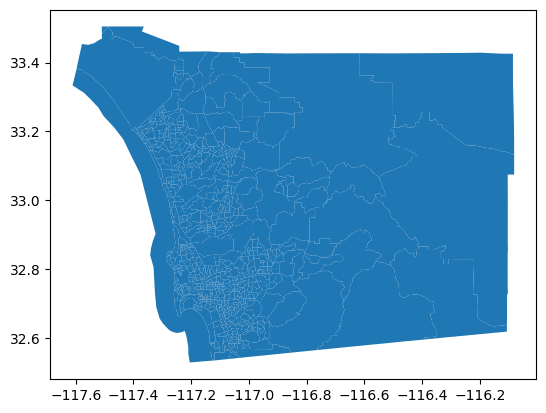

In [17]:
tract_df.plot()

<Axes: >

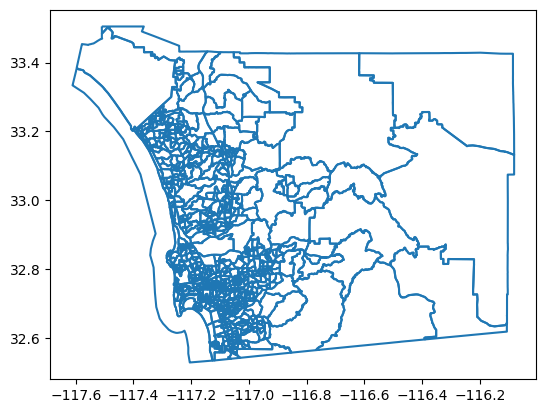

In [36]:
travel_time_df=travel_time_df.rename(columns={'tract':'TRACTCE'})
new_pd = gpd.GeoDataFrame(pd.merge(travel_time_df,tract_df,on='TRACTCE'))
new_pd.boundary.plot()

In [37]:
new_pd = new_pd.drop(736)

In [38]:
for i in range(2,14):
    new_pd[str(i)] = new_pd[str(i)]/new_pd['B08303_001E']


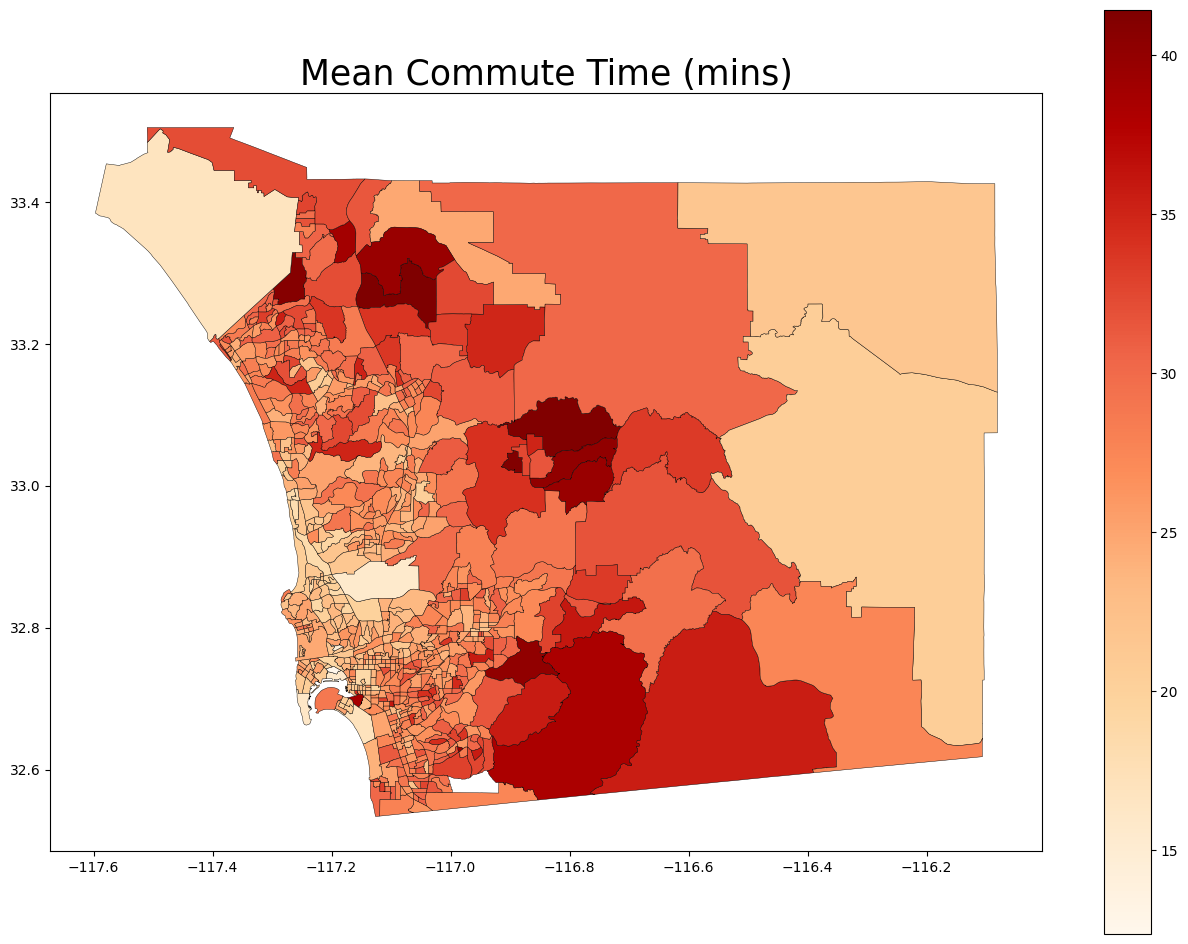

In [39]:
new_pd.plot(column='Mean Time',
            cmap='OrRd',
            linewidth=0.3,
            legend=True,
            figsize=(16,12),
            edgecolor='k',
            )
plt.title('Mean Commute Time (mins)', fontsize=25)
plt.savefig('MeanTime.png')
#new_pd.centroid

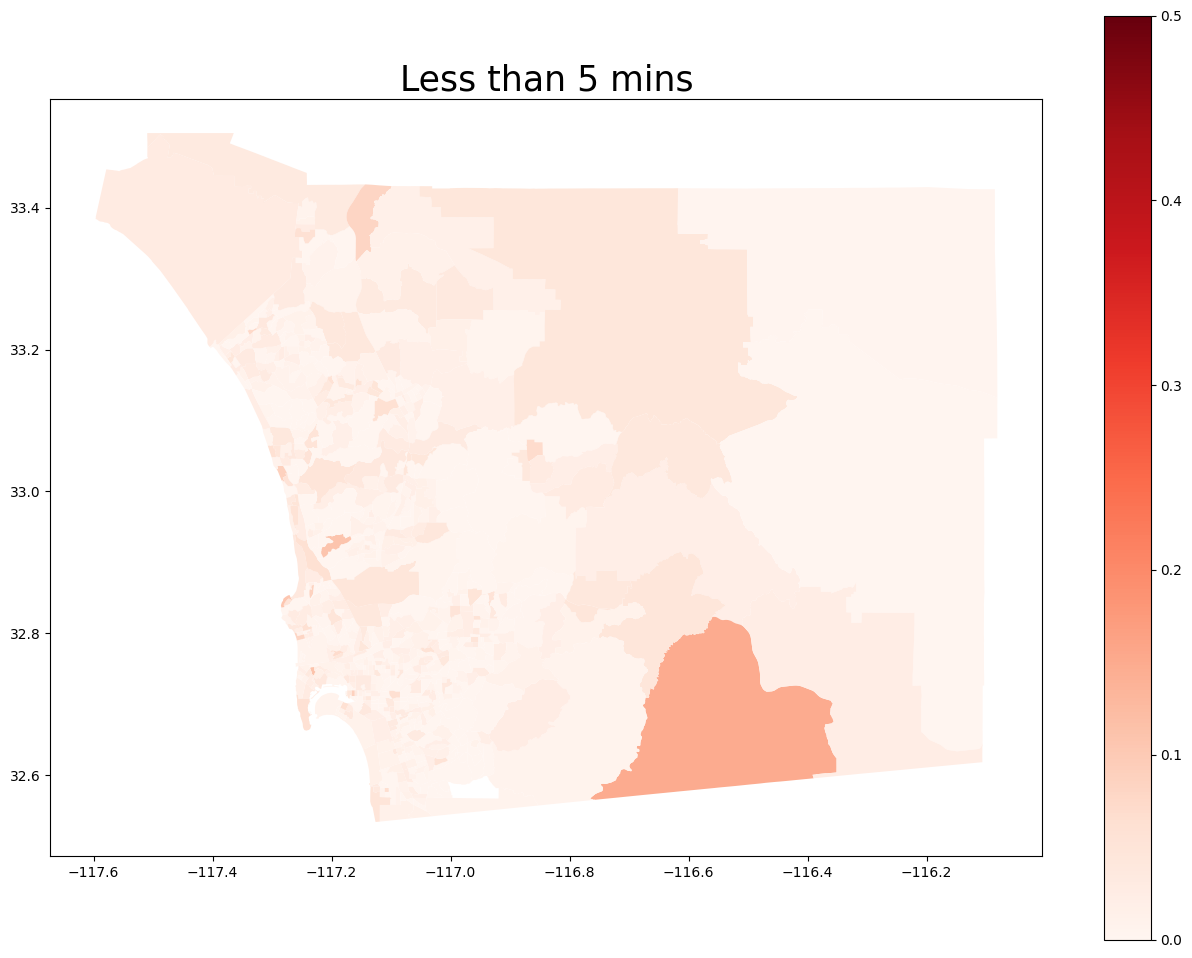

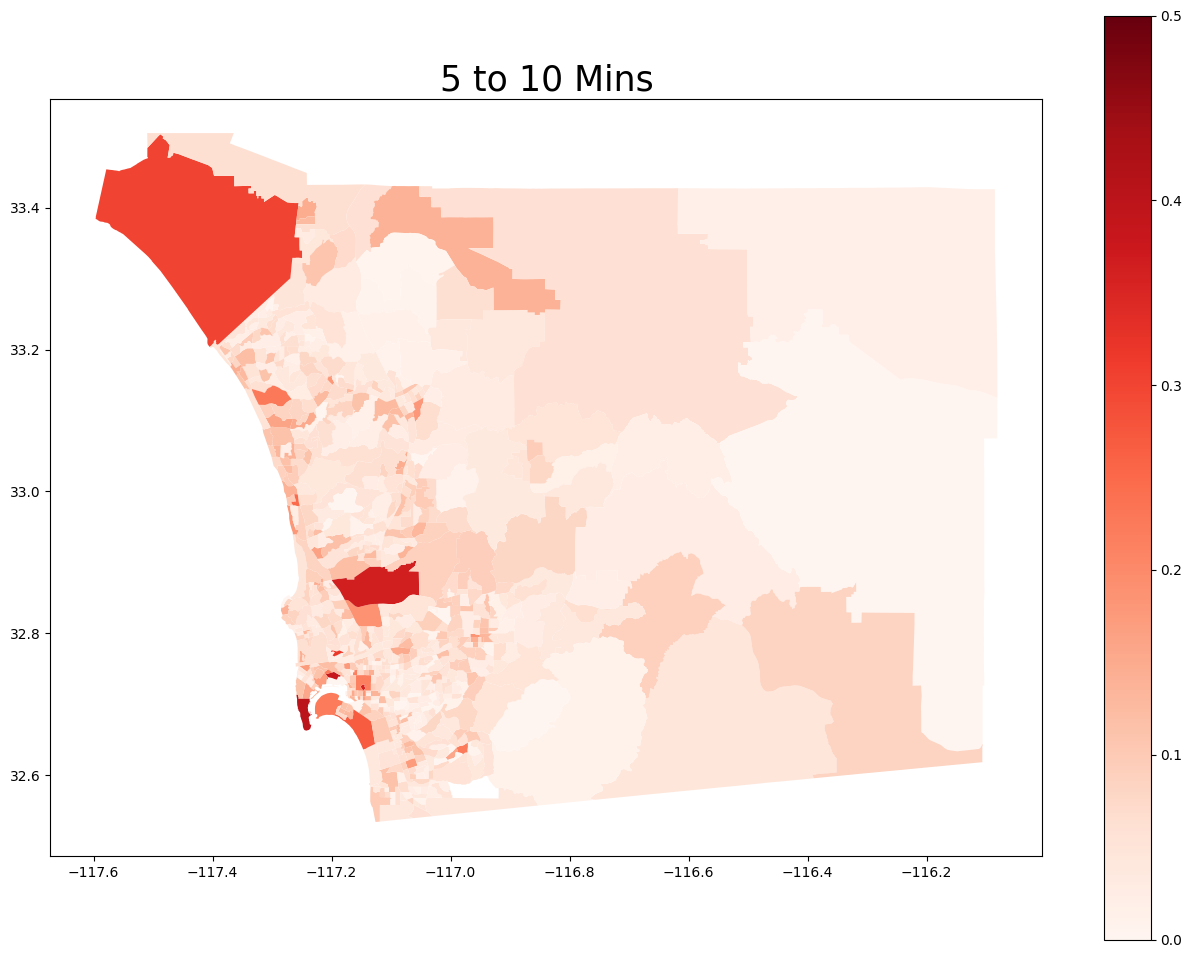

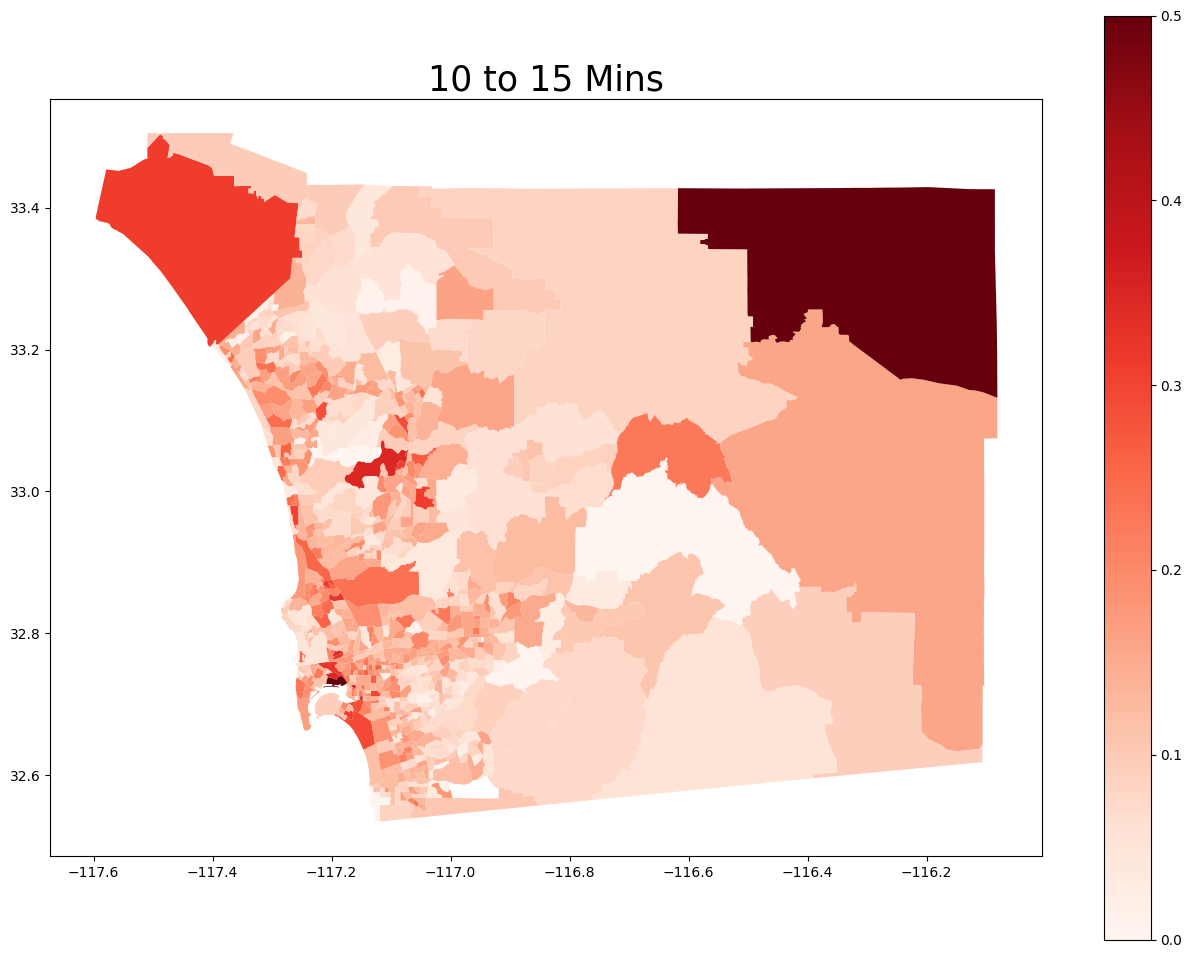

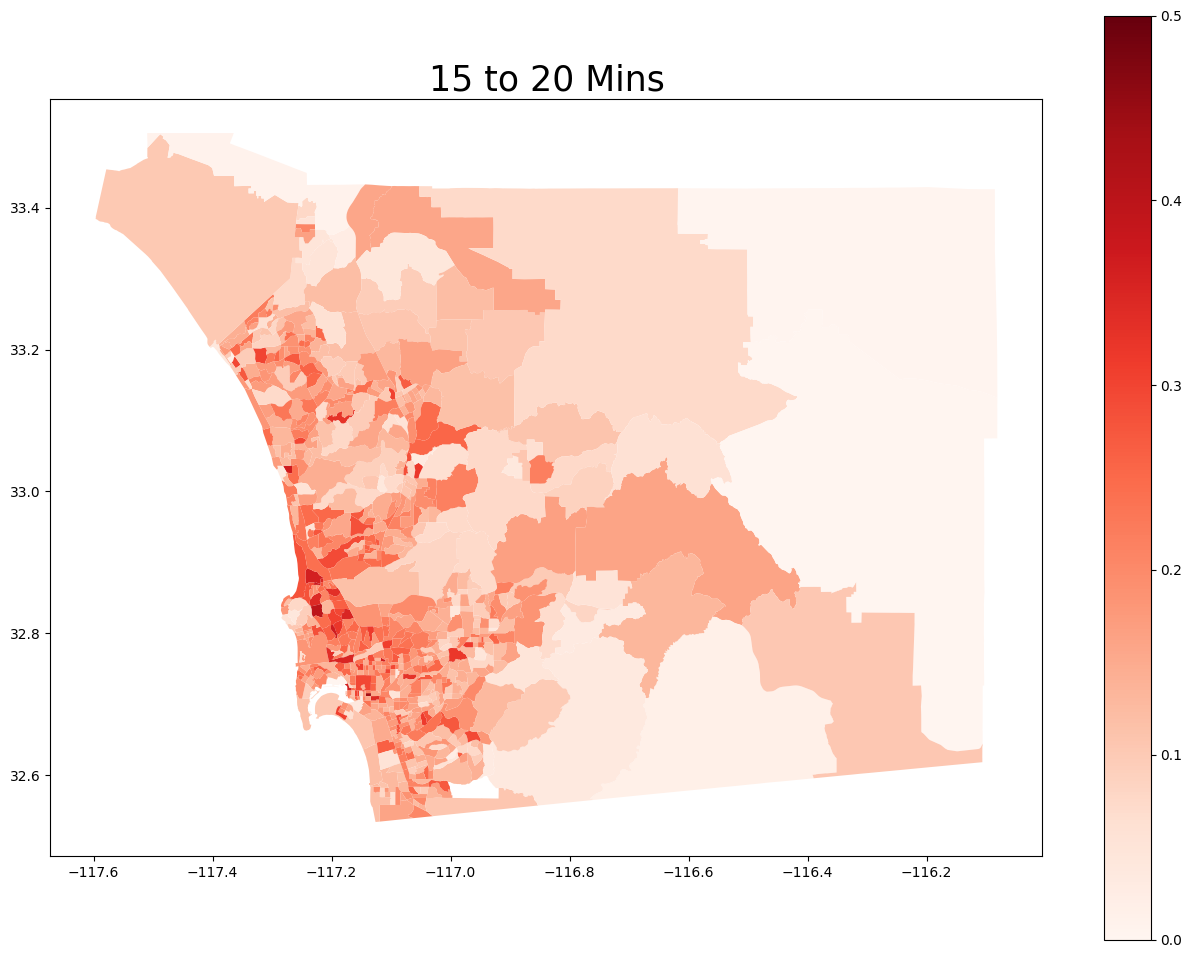

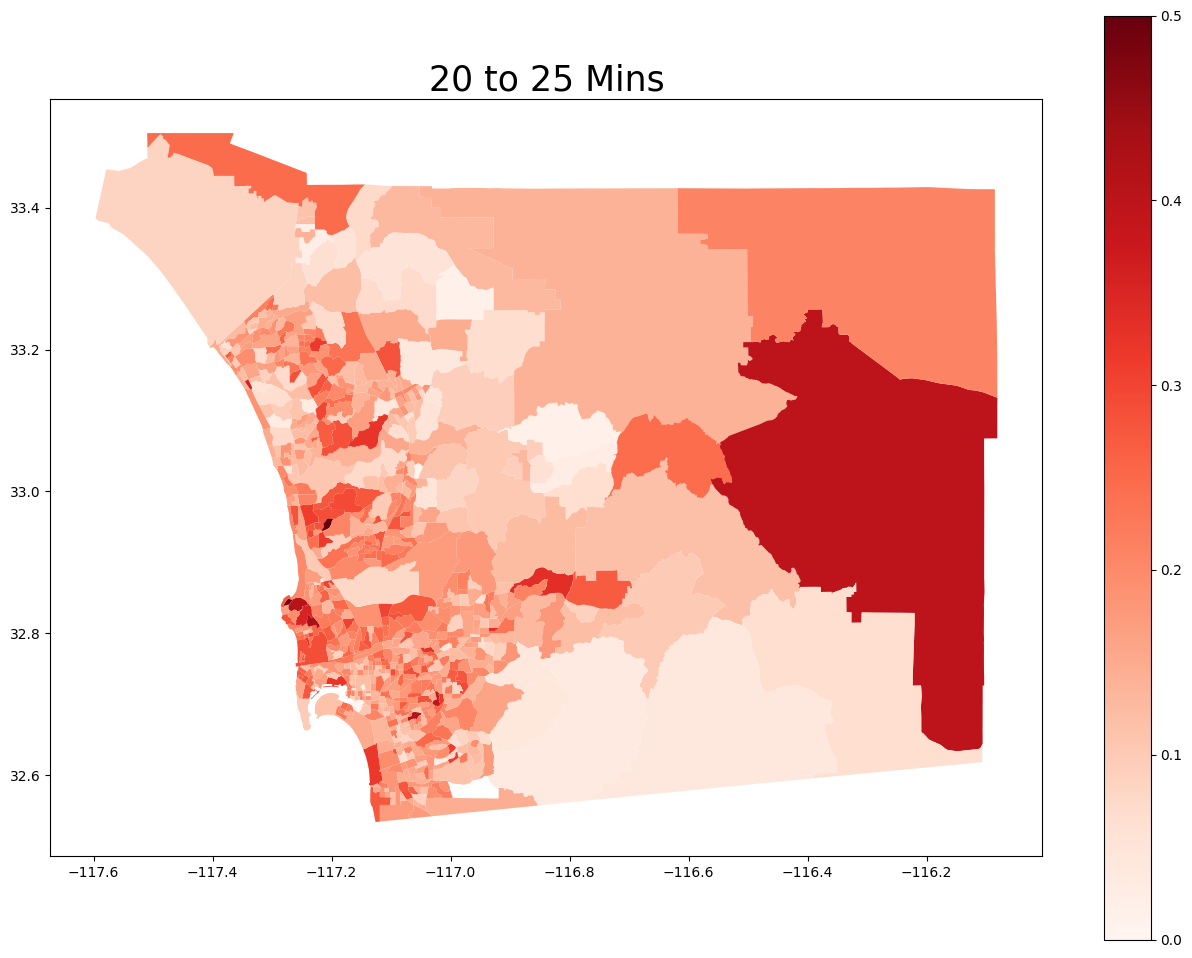

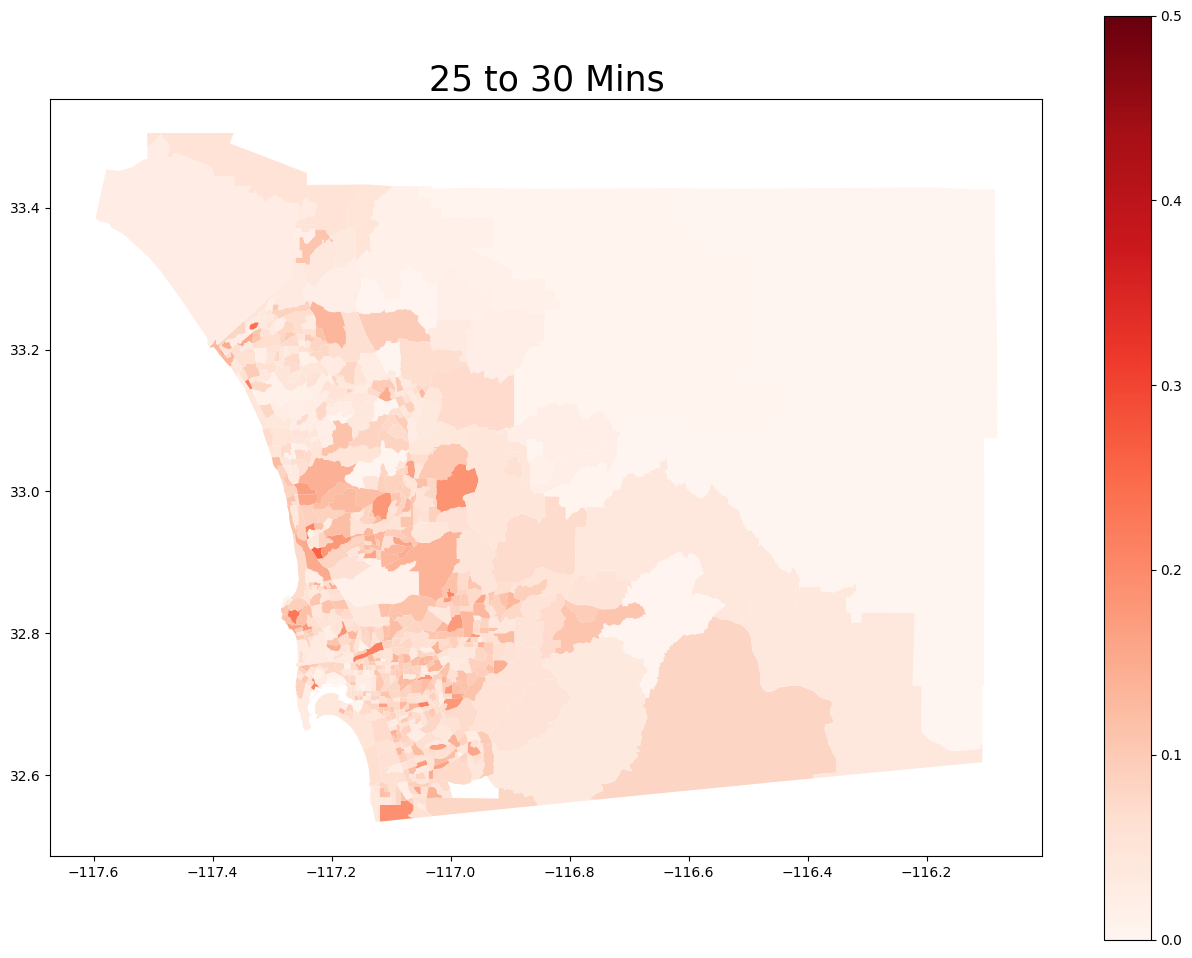

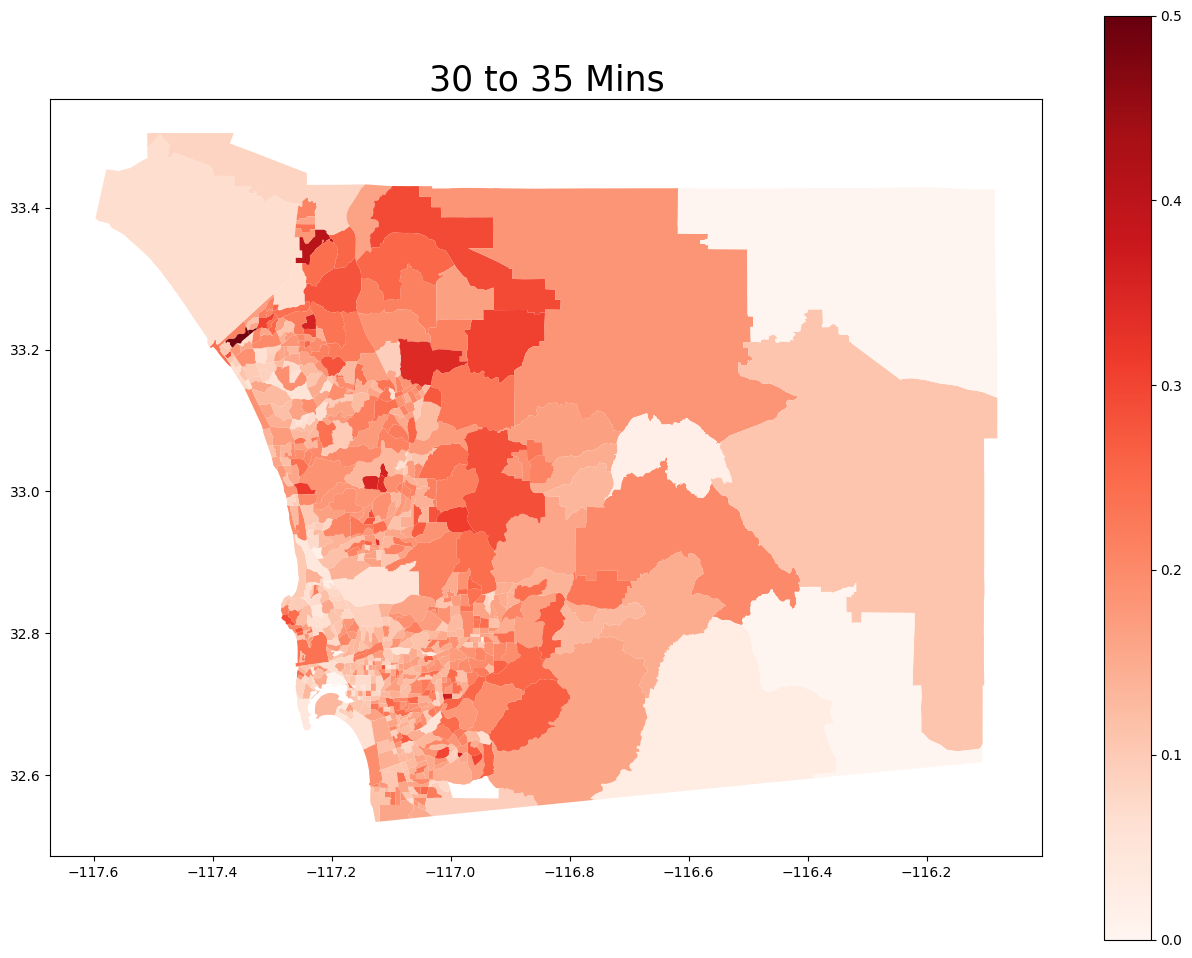

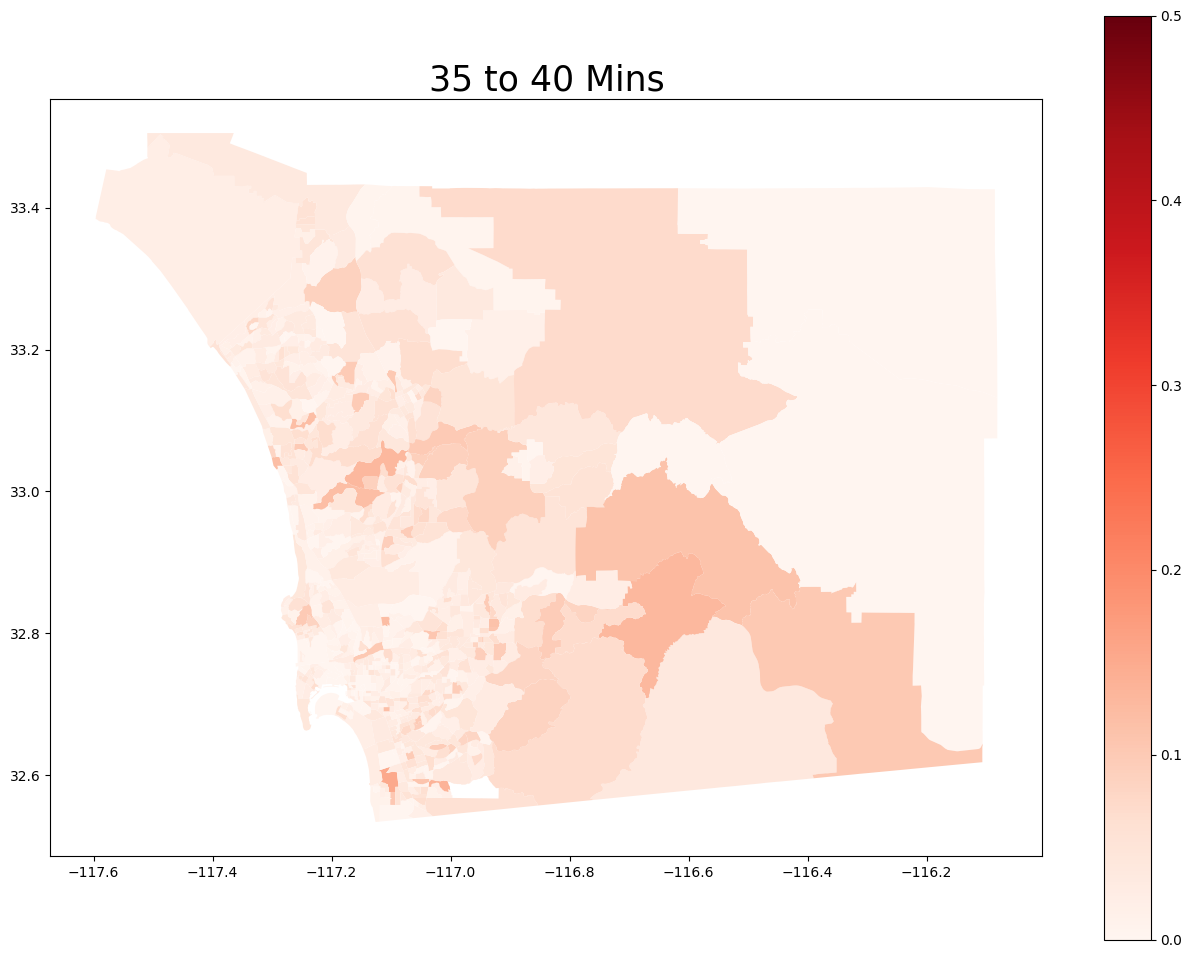

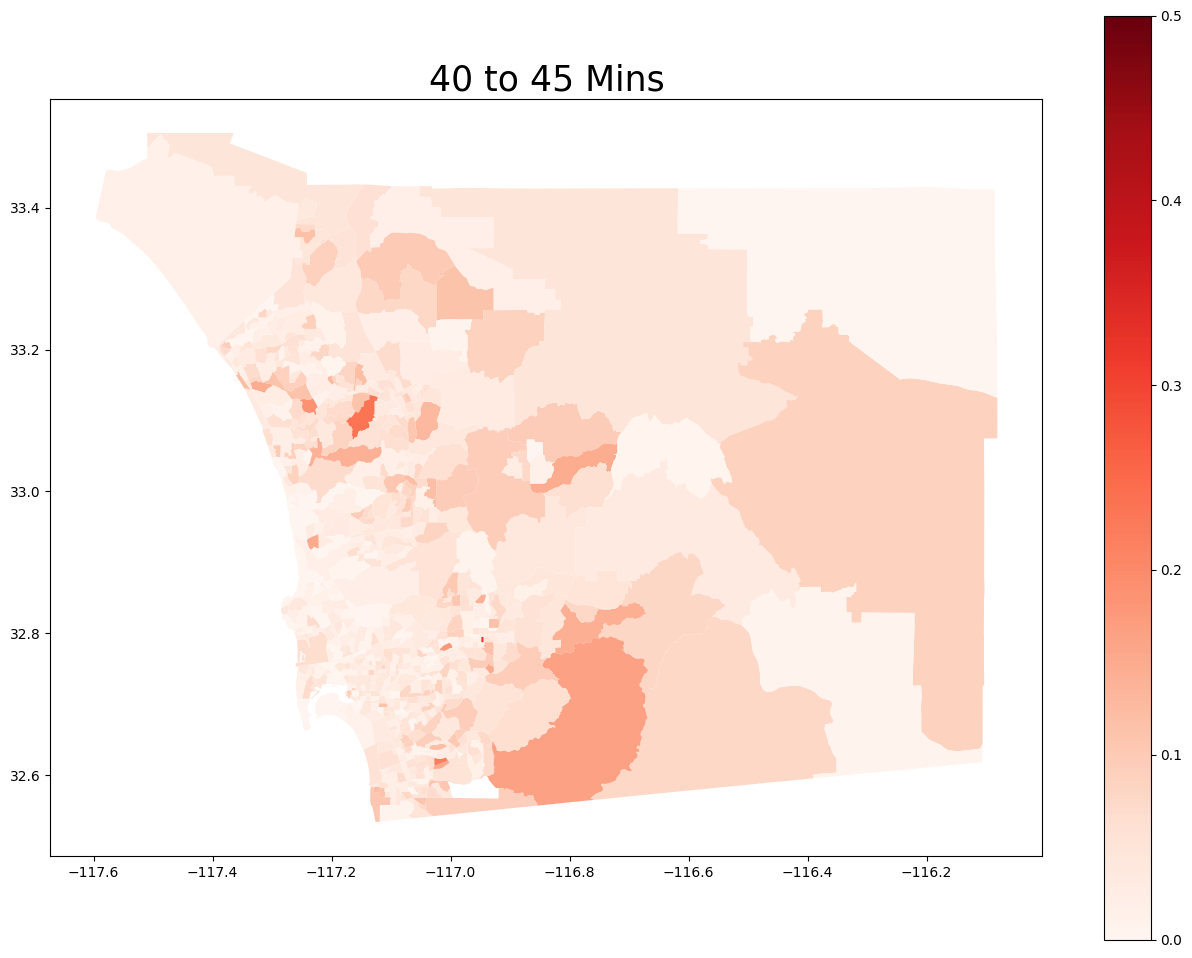

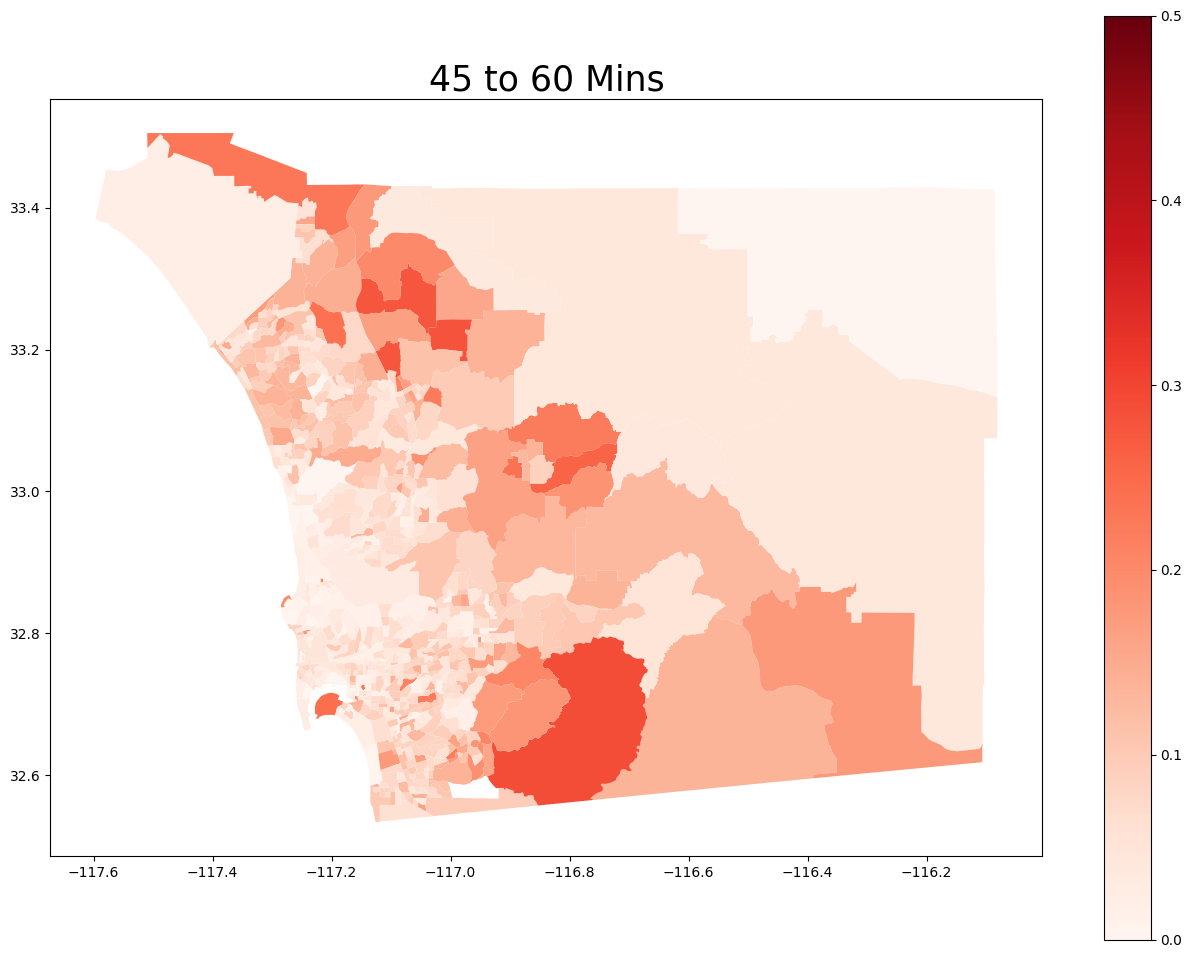

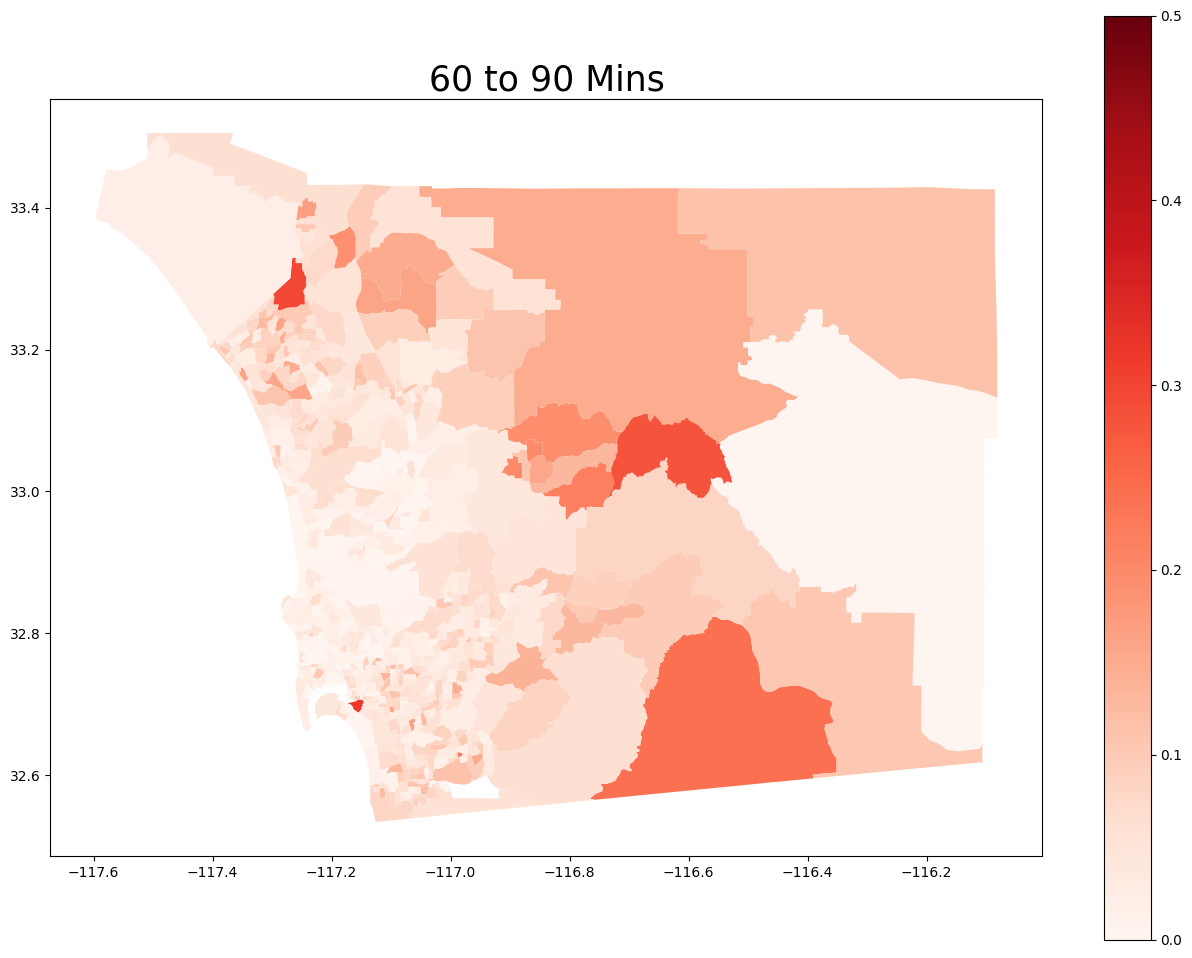

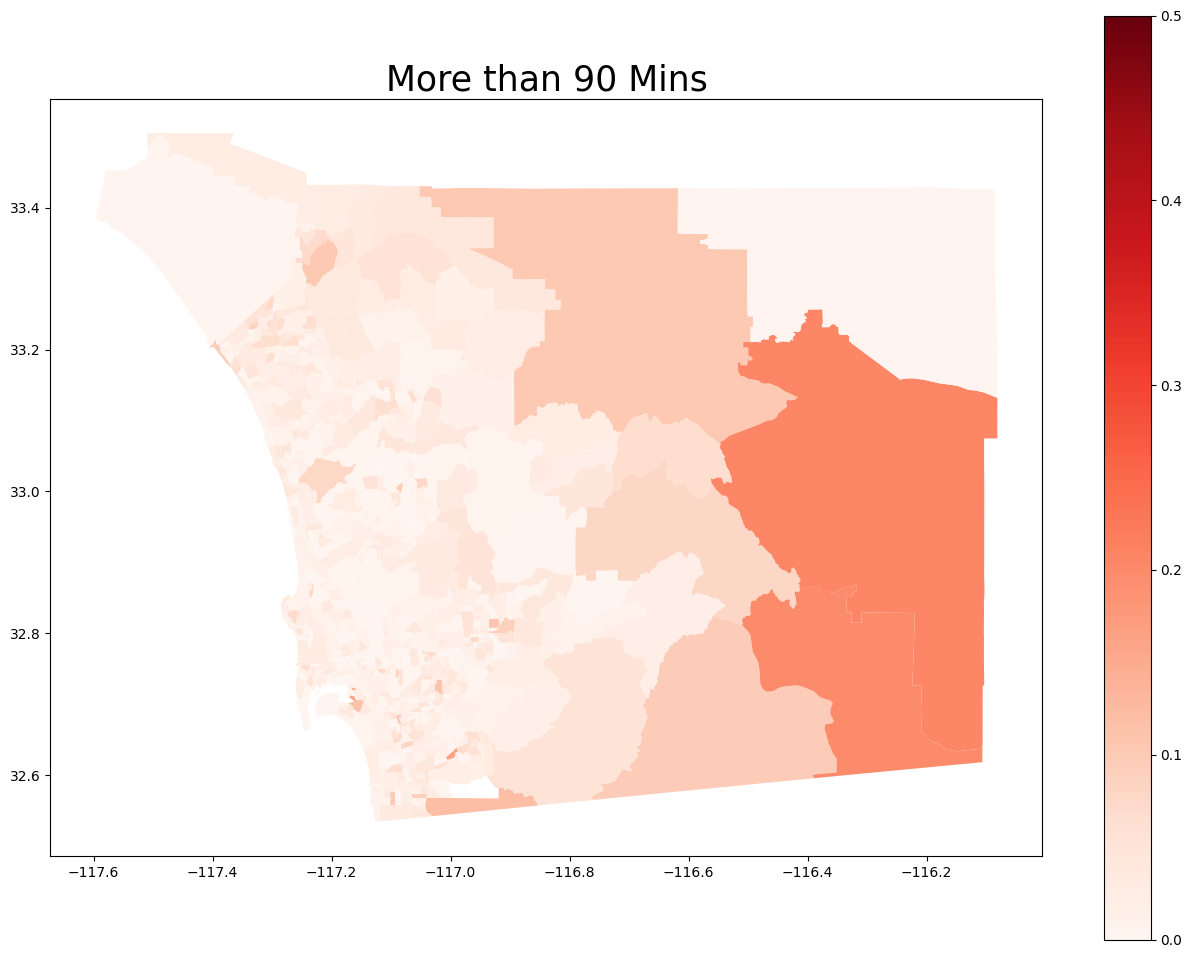

In [27]:
name_list = ['Less than 5 mins'
             , '5 to 10 Mins'
             , '10 to 15 Mins'
             , '15 to 20 Mins'
             , '20 to 25 Mins'
             , '25 to 30 Mins'
             , '30 to 35 Mins'
             , '35 to 40 Mins'
             , '40 to 45 Mins'
             , '45 to 60 Mins'
             , '60 to 90 Mins'
             , 'More than 90 Mins']

for i in range(2,14): 
    new_pd.plot(column=str(i),
                cmap='Reds',
                legend=True,
                figsize=(16,12),
                vmin=0,vmax=0.5)
    plt.title(name_list[i-2],fontsize=25)
    
    plt.savefig('Fig'+str(i)+'.png',format='png')
